<a href="https://colab.research.google.com/github/njadux/TensorFlow/blob/main/CNN_Image_Classification_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This project is an image classification task using a Convolutional Neural Network (CNN) built with TensorFlow and Keras.

- The goal is to train a model that can accurately classify images into predefined categories, in this case, cats and dogs.

- The project uses a dataset of images, splits it into training and testing sets, preprocesses the images, builds a CNN model, trains the model, and evaluates its performance.

In [ ]:
 import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

'[Background music plays].gdoc'                            mazen.jpg
'Colab Notebooks'/                                         NJADUX/
 datasets/                                                'Nuha Jadu - 2024 (1).pdf'
'Dive into Sustainable Games: Play for the Planet!.gdoc'  'Nuha Jadu 24-25.pdf'
'Google AMS - SNG - Made with Clipchamp.mp4'              'Resume-Nuha-Jadu (6) (2).pdf'
 image1.jpg                                               'Untitled drawing.gdraw'
'Image Classification CNN Keras Dataset'@                 'WTM Ambassadors.gform'
 img.jpeg                                                 'WTM Speakers .gform'
'Journey to Gen Ai || Alex.gslides'


In [ ]:
cd Image Classification CNN Keras Dataset

/content/drive/.shortcut-targets-by-id/1dZvL1gi5QLwOGrfdn9XEsi4EnXx535bD/Image Classification CNN Keras Dataset


In [ ]:
ls

input.csv  input_test.csv  labels.csv  labels_test.csv


In [ ]:
x_train = np.loadtxt('input.csv', delimiter = ',') # use np.loadtxt to load data from a text file with a delimiter
x_test = np.loadtxt('input_test.csv', delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [ ]:
print('shape of x_train:', x_train)
print('shape of x_test:', x_test)
print('shape of y_train:', y_train)
print('shape of y_test:', y_test)

shape of x_train: [[ 37.  39.  25. ...  58.  54.  29.]
 [131. 128. 135. ...  71.  96.  74.]
 [ 80.  92.  88. ... 124. 119.  99.]
 ...
 [231. 226. 230. ...  62.  65.  72.]
 [ 61.  61.  63. ... 135. 123. 123.]
 [ 64.  31.  12. ...  61.  49.  35.]]
shape of x_test: [[118.  82.  96. ... 140.  79.  16.]
 [223. 211. 163. ...  70.  73.  78.]
 [ 73.  67.  43. ... 222. 211. 165.]
 ...
 [249. 245. 242. ...  73.  72.  68.]
 [ 97.  96. 102. ...  84.  78.  80.]
 [ 94.  66.  63. ... 119.  96.  80.]]
shape of y_train: [0. 0. 0. ... 1. 1. 1.]
shape of y_test: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.

In [ ]:
# Resizing
x_train = x_train.reshape(len(x_train), 100, 100, 3) #width, height, rgb
x_test = x_test.reshape(len(x_test), 100, 100, 3)

In [ ]:
y_train = y_train.reshape(len(y_train), 1) #1-dimensional arrays (vectors)
y_test = y_test.reshape(len(y_test), 1)

In [ ]:
print('shape of x_train:', x_train)
print('shape of x_test:', x_test)
print('shape of y_train:', y_train)
print('shape of y_test:', y_test)

shape of x_train: [[[[ 37.  39.  25.]
   [ 26.  24.   9.]
   [ 34.  25.  10.]
   ...
   [ 57.  44.  35.]
   [ 61.  47.  38.]
   [ 65.  51.  42.]]

  [[ 45.  43.  28.]
   [ 28.  25.   8.]
   [ 52.  40.  24.]
   ...
   [ 54.  41.  32.]
   [ 57.  43.  34.]
   [ 61.  47.  38.]]

  [[ 52.  45.  26.]
   [ 32.  24.   5.]
   [ 69.  54.  35.]
   ...
   [ 54.  40.  29.]
   [ 56.  42.  31.]
   [ 59.  45.  34.]]

  ...

  [[ 20.  39.   0.]
   [101. 125.  67.]
   [152. 182. 120.]
   ...
   [ 46.  41.  19.]
   [ 60.  55.  33.]
   [ 60.  55.  33.]]

  [[ 46.  65.   9.]
   [116. 140.  82.]
   [156. 186. 124.]
   ...
   [ 64.  60.  35.]
   [ 75.  71.  46.]
   [ 72.  68.  43.]]

  [[ 81. 100.  44.]
   [126. 150.  92.]
   [146. 176. 114.]
   ...
   [ 67.  63.  38.]
   [ 78.  74.  49.]
   [ 58.  54.  29.]]]


 [[[131. 128. 135.]
   [160. 157. 164.]
   [198. 192. 204.]
   ...
   [250. 249. 247.]
   [255. 255. 253.]
   [250. 249. 245.]]

  [[140. 137. 144.]
   [127. 124. 131.]
   [120. 114. 124.]
   ...
   

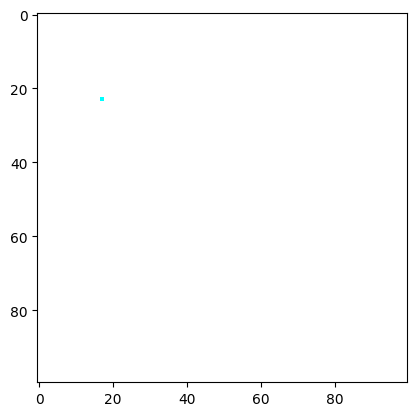

In [ ]:
index = random.randint(0, len(x_train)-1)
plt.imshow(x_train[index])
plt.show()

In [ ]:
# Normalization
x_train = x_train /255
x_test = x_test/255

In [ ]:
print('shape of x_train:', x_train)
print('shape of x_test:', x_test)

shape of x_train: [[[[0.14509804 0.15294118 0.09803922]
   [0.10196078 0.09411765 0.03529412]
   [0.13333333 0.09803922 0.03921569]
   ...
   [0.22352941 0.17254902 0.1372549 ]
   [0.23921569 0.18431373 0.14901961]
   [0.25490196 0.2        0.16470588]]

  [[0.17647059 0.16862745 0.10980392]
   [0.10980392 0.09803922 0.03137255]
   [0.20392157 0.15686275 0.09411765]
   ...
   [0.21176471 0.16078431 0.1254902 ]
   [0.22352941 0.16862745 0.13333333]
   [0.23921569 0.18431373 0.14901961]]

  [[0.20392157 0.17647059 0.10196078]
   [0.1254902  0.09411765 0.01960784]
   [0.27058824 0.21176471 0.1372549 ]
   ...
   [0.21176471 0.15686275 0.11372549]
   [0.21960784 0.16470588 0.12156863]
   [0.23137255 0.17647059 0.13333333]]

  ...

  [[0.07843137 0.15294118 0.        ]
   [0.39607843 0.49019608 0.2627451 ]
   [0.59607843 0.71372549 0.47058824]
   ...
   [0.18039216 0.16078431 0.0745098 ]
   [0.23529412 0.21568627 0.12941176]
   [0.23529412 0.21568627 0.12941176]]

  [[0.18039216 0.25490196 0

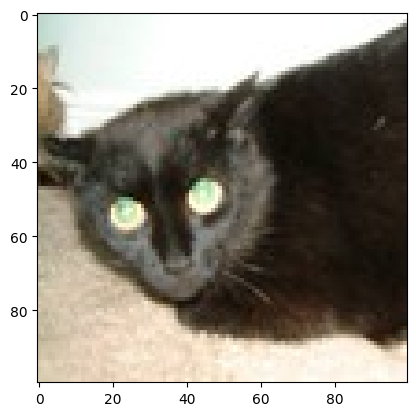

In [ ]:
img = random.randint(0, len(x_train)-1)
plt.imshow(x_train[img])
plt.show()

# **Build the CNN Model:**
Create a Sequential Model: Initialize a Sequential model.
Add Layers:
- Convolutional Layers: Use Conv2D layers to extract features from the images. Experiment with different filter sizes and activation functions (e.g., ReLU).
- Pooling Layers: Employ MaxPooling2D layers to reduce the dimensionality of feature maps and improve computational efficiency.
- Flatten Layer: Flatten the feature maps into a 1D vector.
- Dense Layers: Add fully connected dense layers to classify the extracted features. The final layer should have the number of output classes.


In [ ]:
num_classes = len(np.unique(y_test))   #Should use either y_train or y_test to determine num_classes
print(num_classes)

2


In [ ]:
model = Sequential([
        Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3) ), #num of kernels(filters), filter size, img shape(wide, hieght, rgb)
        MaxPooling2D((2,2)), #pooling window to reduce dimentions
        Conv2D(64, (3,3), activation = 'relu', ), #num of kernels should be increased


    MaxPooling2D(2,2),
    Flatten(),
    Dense(130, activation = 'relu', ), #chooses num of neurons
    Dense(num_classes, 'softmax')  #the actual number of classes in your dataset
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compile the Model:**
- Choose Optimizer: Select an optimizer (e.g., Adam) to update model weights during training.
- Define Loss Function: Specify a loss function appropriate for classification z(e.g., categorical cross-entropy).
- Set Metrics: Choose metrics to evaluate model performance (e.g., accuracy).


In [ ]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics= ['accuracy']) #metrics should be passed as a list

# **Train the Model:**
- Create Data Generators: Use ImageDataGenerator to augment your training data (e.g., rotation, flipping) for better generalization.

   /train w test data gen w generator
- Train the Model: Fit the model to the training data, using the data generators for efficient training.


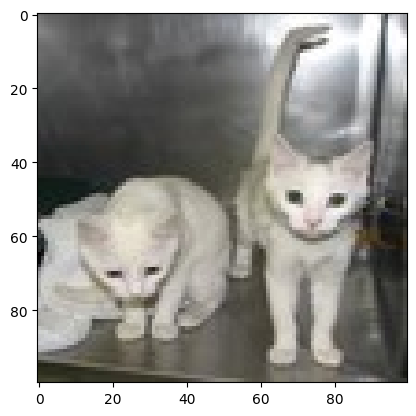

In [ ]:
indx = random.randint(0, len(y_test))
plt.imshow(x_test[indx])
plt.show()

In [ ]:
prediction = model.predict(x_test[indx].reshape(1,100,100,3))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
[[0.5342665  0.46573356]]


In [ ]:
class_probabilities = prediction[0]
if (class_probabilities[1] > class_probabilities[0]):
  prediction = 'dog'
else:
  prediction = 'cat'
print('The image you provided to the model is',prediction)

The image you provided to the model is cat
